<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

Authors: Kevin Markham (DC), Ed Podojil (NYC)

### Lesson Guide
- [Introduce the bikeshare data](#introduce-the-bikeshare-data)
	- [Reading in the data](#reading-in-the-data)
	- [Visualizing the data](#visualizing-the-data)
- [Linear regression basics](#linear-regression-basics)
	- [Form of linear regression](#form-of-linear-regression)
	- [Building a linear regression model](#building-a-linear-regression-model)
	- [Using the model for prediction](#using-the-model-for-prediction)
	- [Does the scale of the features matter?](#does-the-scale-of-the-features-matter)
- [Working with multiple features](#working-with-multiple-features)
	- [Visualizing the data (part 2)](#visualizing-the-data-part-)
	- [Adding more features to the model](#adding-more-features-to-the-model)
- [What is Multicollinearity?](#what-is-multicollinearity)
- [Choosing between models](#choosing-between-models)
	- [Feature selection](#feature-selection)
	- [Evaluation metrics for regression problems](#evaluation-metrics-for-regression-problems)
	- [Comparing models with train/test split and RMSE](#comparing-models-with-traintest-split-and-rmse)
	- [Comparing testing RMSE with null RMSE](#comparing-testing-rmse-with-null-rmse)
- [Creating features](#creating-features)
	- [Handling categorical features](#handling-categorical-features)
	- [Feature engineering](#feature-engineering)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

from IPython.display import Image

<a id="introduce-the-bikeshare-data"></a>
## Introduce the bikeshare data

<a id="reading-in-the-data"></a>
<a id="reading-in-the-data"></a>

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

In [5]:
# read the data and set the datetime as the index

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [6]:
# Examine the head
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
bikes.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [8]:
# Examine the shape of the dataframe
bikes.shape

(10886, 11)

Take a minute to look over the data before we answer the following questions.

- What does each observation represent?
- What is the response variable (as defined by Kaggle)?
- How many features are there?
- How many observations are there?

In [9]:
# "count" is a method, so it's best to name the 'count' column something else
bikes.rename(columns={'count':'total'},inplace=True)

<a id="visualizing-the-data"></a>
<a id="visualizing-the-data"></a>
### Visualizing the data

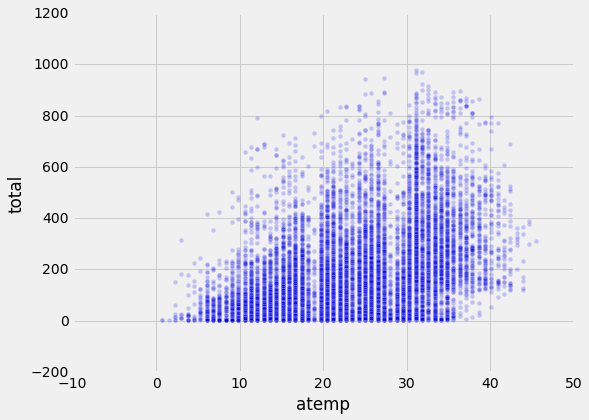

In [12]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='atemp', y='total', alpha=0.2)

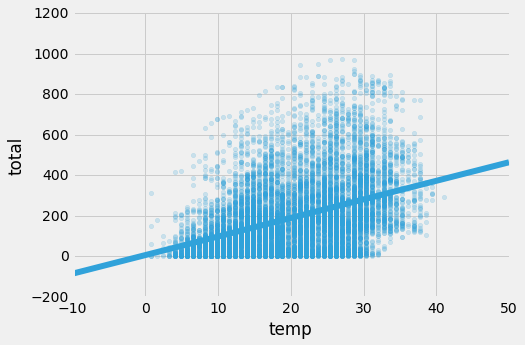

In [13]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

<a id="building-a-linear-regression-model"></a>
<a id="building-a-linear-regression-model"></a>
### Building a linear regression model

<a id="form-of-linear-regression"></a>
<a id="form-of-linear-regression"></a>
### Form of linear regression

$y = \alpha + \beta X + \epsilon$

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

In the diagram below:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

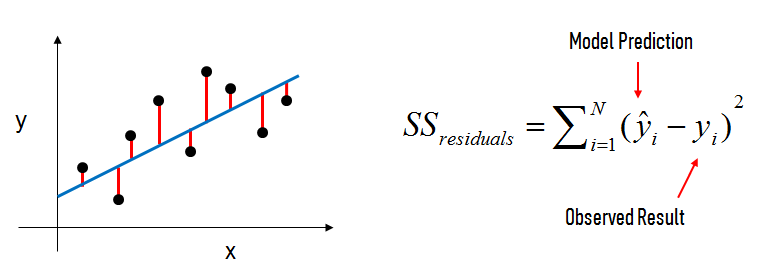

In [14]:
Image(r'..\assets\images\estimating_coefficients.png')

In [15]:
# create X and y
feature_cols = ['temp']

In [16]:
X = bikes[feature_cols]
y = bikes.total

#### Partner-up: Use the sklearn documentation to create a simple linear regression between temperature and total bike rentals

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [18]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# print the coefficients
print linreg.coef_

linreg.intercept_

[ 9.17054048]


6.0462129596167813

Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. (Why?)

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.

<a id="using-the-model-for-prediction"></a>
<a id="using-the-model-for-prediction"></a>
### Using the model for prediction

#### Partner-up: How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [22]:
# manually calculate the prediction
linreg.intercept_ + linreg.coef_*25

array([ 235.309725])

In [25]:
# use the predict method
linreg.predict([[25],[35],[45]])

array([ 235.309725  ,  327.01512981,  418.72053462])

<a id="does-the-scale-of-the-features-matter"></a>
<a id="does-the-scale-of-the-features-matter"></a>
### Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [26]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


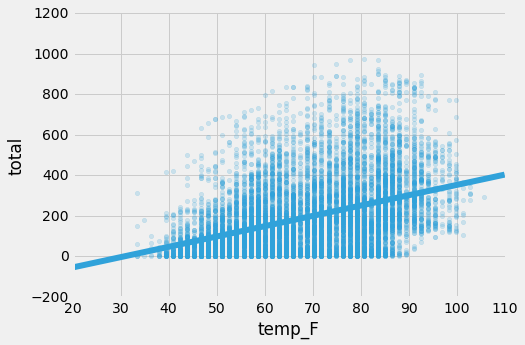

In [27]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [28]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

-156.985617821
[ 5.09474471]


In [29]:
# convert 25 degrees Celsius to Fahrenheit
25 * 1.8 + 32

77.0

In [30]:
# predict rentals for 77 degrees Fahrenheit
linreg.predict(77)

array([ 235.309725])

**Conclusion:** The scale of the features is **irrelevant** for linear regression models. When changing the scale, we simply change our **interpretation** of the coefficients.

In [31]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

<a id="working-with-multiple-features"></a>
## Working with multiple features

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bike-share data to showcase what this means and to explain a concept called multicollinearity.

<a id="visualizing-the-data-part-"></a>
<a id="visualizing-the-data-part-"></a>
### Visualizing the data (part 2)

In [32]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

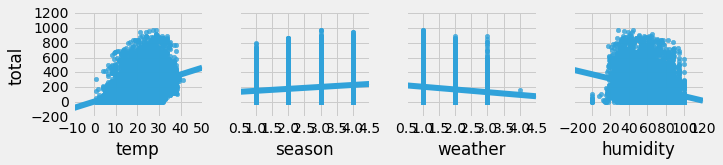

In [33]:
# multiple scatter plots in Seaborn
plt.figure(figsize=(12,10))
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')
plt.show()

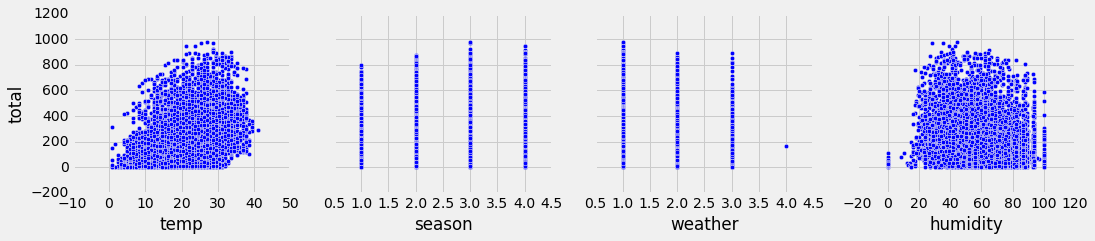

In [34]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

Are bike rentals actually increasing as the season increases?

In [35]:
# cross-tabulation of season and month
pd.crosstab(bikes.season, bikes.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


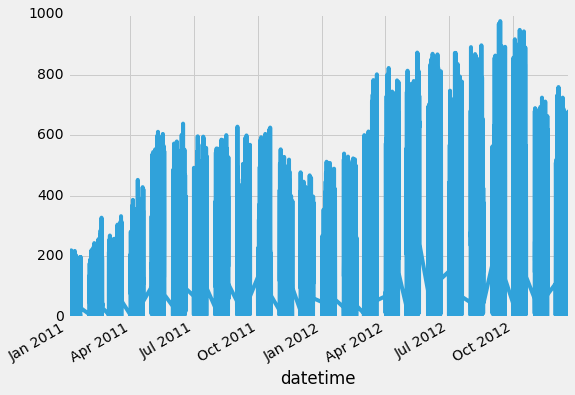

In [36]:
# line plot of rentals
bikes.total.plot()

What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

In [37]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


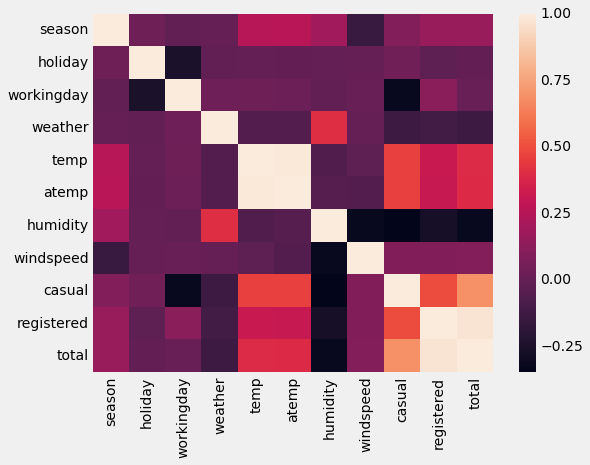

In [38]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

What relationships do you notice?

#### Partner-up: Let's run a multiple linear regression with the following variables: temperature, season, weather, and humidity

In [39]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [40]:
# create your X and y datasets
X = bikes[feature_cols]
y = bikes.total
# instantiate and fit your X and y datasets
linreg = LinearRegression()
linreg.fit(X,y)

# print the coefficients
print(linreg.coef_)
print(linreg.intercept_)

[  7.86482499  22.53875753   6.67030204  -3.11887338]
159.520687861


In [41]:
# pair the feature names with the coefficients using a command called 'zip'
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0        (temp, 7.86482499248)
1      (season, 22.5387575325)
2     (weather, 6.67030203592)
3    (humidity, -3.1188733824)
dtype: object


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase/decrease of ___ bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase/decrease of ___ bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase/decrease of ___ bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental increase/decrease of ___ bikes**.

Does anything look incorrect? 

<a id="what-is-multicollinearity"></a>
<a id="what-is-multicollinearity"></a>
## What is Multicollinearity?

With the bike share data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership.

            temp     atemp    casual
temp    1.000000  0.984948  0.467097
atemp   0.984948  1.000000  0.462067
casual  0.467097  0.462067  1.000000
Axes(0.08,0.07;0.696x0.83)


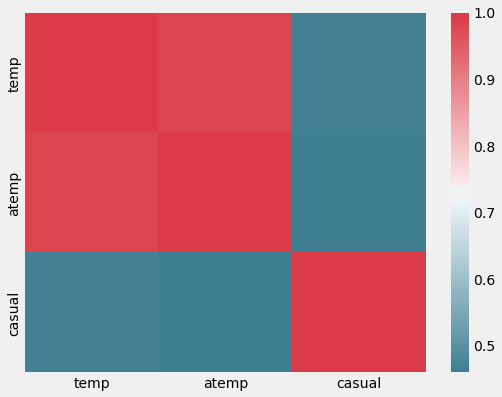

In [42]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print(correlations)
print(sns.heatmap(correlations, cmap=cmap))

In [43]:
# create a list of features
feature_cols = ['temp', 'atemp']

In [44]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
#print(linreg.intercept_)
#print(linreg.coef_)
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0      (temp, 8.19865874468)
1    (atemp, 0.907208084466)
dtype: object


In [46]:
# now just use stemp
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
#print(linreg.intercept_)
#print(linreg.coef_)
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

0    (temp, 9.17054048143)
dtype: object


The coefficient for temperature feel went from 0.9 to 8.3! That's what multicollinearity can do. It may not necessarily impact our predictions, but it will make our interpretation of our coefficients inconsistent.

<a id="choosing-between-models"></a>
## Choosing between models

<a id="feature-selection"></a>
<a id="feature-selection"></a>
### Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- R-squared **always increases** so adding features to your model that are unrelated to the response will always **increase the R-squared value**
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

<a id="evaluation-metrics-for-regression-problems"></a>
<a id="evaluation-metrics-for-regression-problems"></a>
### Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [47]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [48]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

('MAE:', 2.0)
('MSE:', 7.5)
('RMSE:', 2.7386127875258306)


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

Here's an additional example, to demonstrate how MSE/RMSE punish larger errors:

In [49]:
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print('MAE:', metrics.mean_absolute_error(true, pred))

# MSE and RMSE are larger than before
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

('MAE:', 2.0)
('MSE:', 16.0)
('RMSE:', 4.0)


<a id="comparing-models-with-traintest-split-and-rmse"></a>
<a id="comparing-models-with-traintest-split-and-rmse"></a>
### Comparing models with train/test split and RMSE

In [53]:
from sklearn.cross_validation import train_test_split
# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [54]:
# compare different sets of features
print(train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(['temp', 'season', 'weather']))
print(train_test_rmse(['weather', 'humidity','temp']))

155.649459131
164.165399763
157.250295181


In [ ]:
# using these as features is not allowed!
print(train_test_rmse(['casual', 'registered']))

<a id="comparing-testing-rmse-with-null-rmse"></a>
<a id="comparing-testing-rmse-with-null-rmse"></a>
### Comparing testing RMSE with null RMSE

Null RMSE is the RMSE that could be achieved by **always predicting the mean response value**. It is a benchmark against which you may want to measure your regression model.

In [55]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([ 192.26451139,  192.26451139,  192.26451139, ...,  192.26451139,
        192.26451139,  192.26451139])

In [56]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

## Plotting Residuals
The degree to which we're wrong is important, but _how_ we are wrong is also important to understand

In [57]:
# define a function that accepts a list of features and returns an array of the y_test variables, and the predictions from x_test
def train_test_residuals(feature_cols):
    X = bikes[feature_cols]
    y = bikes.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return y_pred, y_test - y_pred

pred, residuals = train_test_residuals(['temp', 'season', 'weather', 'humidity'])

In [58]:
residuals.head()

datetime
2012-03-07 21:00:00     51.773024
2012-04-12 03:00:00   -117.698422
2011-02-06 10:00:00    -32.381843
2011-12-05 23:00:00    -76.525877
2011-08-08 14:00:00   -216.695189
Name: total, dtype: float64

### There are two main ways we can check our residuals
   1. Check their distribution
   2. Check their pattern against the ground truth

(array([  62.,  383.,  899.,  706.,  317.,  181.,   77.,   48.,   38.,   11.]),
 array([-335.04924559, -234.92795608, -134.80666657,  -34.68537705,
          65.43591246,  165.55720198,  265.67849149,  365.799781  ,
         465.92107052,  566.04236003,  666.16364954]),
 <a list of 10 Patch objects>)

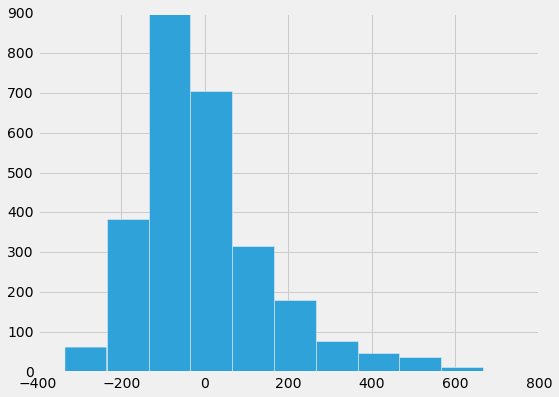

In [59]:
# Plot the distribution of our residuals
plt.hist(residuals)

In [ ]:
# Use a scatter plot to compare our residuals to their actual value
plt.scatter(pred, residuals)

<a id="creating-features"></a>
## Creating features

<a id="handling-categorical-features"></a>
<a id="handling-categorical-features"></a>
### Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [60]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.head()

,season_1,season_2,season_3,season_4
datetime,,,,
2011-01-01 00:00:00,1,0,0,0
2011-01-01 01:00:00,1,0,0,0
2011-01-01 02:00:00,1,0,0,0
2011-01-01 03:00:00,1,0,0,0
2011-01-01 04:00:00,1,0,0,0


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**

In [61]:
# drop the first column
season_dummies.drop('season_1', axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1,)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

In [ ]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes2 = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes2.sample(n=5, random_state=1)

In [ ]:
bikes = bikes2

In [ ]:
# include dummy variables for season in the model
feature_cols = ['temp','season_2','season_3','season_4','humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

This is much more granular than what we had before (+1 in season => +22.5 increase in bikes)

#### Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

In [ ]:
# compare original season variable with dummy variables
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp','season_2', 'season_3', 'season_4', 'humidity']))

#### Why are the coefficients for summer and fall negative when bike rentals clearly increase in those seasons?

- Let's see what happens if we exclude temperature

In [ ]:
feature_cols = ['season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

<a id="feature-engineering"></a>
<a id="feature-engineering"></a>
### Feature engineering

See if you can create the following features:

- **hour:** as a single numeric feature (0 through 23)
- **hour:** as a categorical feature (use 23 dummy variables)
- **daytime:** as a single categorical feature (daytime=1 from 7am to 8pm, and daytime=0 otherwise)

Then, try using each of the three features (on its own) with `train_test_rmse` to see which one performs the best!

In [ ]:
# hour as a numeric feature
bikes['hour'] = bikes.index.hour

bikes.head()

In [ ]:
# hour as a categorical feature
hour_dummies = pd.get_dummies(bikes.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
bikes = pd.concat([bikes, hour_dummies], axis=1)

bikes.head()

In [ ]:
# daytime as a categorical feature
bikes['daytime'] = ((bikes.hour > 6) & (bikes.hour < 21)).astype(int)

In [ ]:
print(train_test_rmse(['hour']))
print(train_test_rmse(bikes.columns[bikes.columns.str.startswith('hour_')]))
print(train_test_rmse(['daytime']))

##### Let's see what we can do about the seasonality effect

In [ ]:
bikes['year'] = bikes.index.year
bikes['time_period'] = np.where(bikes.year==2012, bikes.season+4, bikes.season)

bikes.time_period.value_counts()

In [ ]:
bikes['year'] = bikes.index.year
bikes['time_period'] = np.where(bikes.year==2012, bikes.season+4, bikes.season)

feature_cols = ['time_period','temp','humidity','weather']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y) 
print(pd.Series(list(zip(feature_cols, linreg.coef_))))

In [ ]:
print(train_test_rmse(['time_period','temp','humidity','weather']))

Time/seasonality is a huge factor in data analysis. This dataset is better suited for a time series model as opposed to linear regression. We will go over those types of models later in the course!

<a id="comparing-linear-regression-with-other-models"></a>
<a id="comparing-linear-regression-with-other-models"></a>
## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias

## Your Turn
- Partner up and use the famous 'Boston' Dataset to perform a linear regression.
- Use the sklearn documentation if you need clarification: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
from sklearn import datasets

from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

In [ ]:
data = pd.DataFrame(boston.data, columns = boston.feature_names)
data['price'] = boston.target

data.corr()['price'].order(ascending=False).head(6)

In [ ]:
# Do you need to change/encode any of the variables?

# Would a train-test split be appropriate for this


In [ ]:
# Plot the relationships between the variables in your dataset

# Do a correlation matrix. Is there any multicollinearity present?

In [ ]:
# Pick variables that are most positively/negatively correlated with housing price




In [ ]:
# Calculate the baseline by using just the average price home


In [ ]:
# What is the R^2 score for your linear regression?


In [ ]:
# Is there any feature engineering we can/should do given the data we have? 
